In [62]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem, median_abs_deviation, percentileofscore
import scienceplots
from cmcrameri import cm

In [63]:
plt.style.use(['science', 'scatter'])

ZMCC


TEST 100 MEAN
0.9368745096639066
TEST 100 MEAN SEM
0.0012807156651482477
TEST 100 MEDIAN
0.9941176582992008
TEST 100 MEDIAN MAD
0.005608059937634136


VAL 100 MEAN
0.9408767470303468
VAL 100 MEAN SEM
0.0012186269677466792
VAL 100 MEDIAN
0.9945307195590039
VAL 100 MEDIAN MAD
0.005197747871334424


TRAIN 100 MEAN
0.991489522114774
TRAIN 100 MEAN SEM
0.00016584223597409742
TRAIN 100 MEDIAN
0.9985958776091393
TRAIN 100 MEDIAN MAD
0.001100807818893046


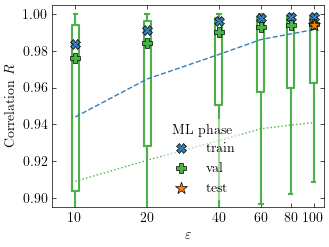

In [138]:
df = pd.read_csv("data_pattern.csv", index_col="index")
space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]

epochs = [10, 20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$\text{Correlation }R$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_box = dict(color="#4daf4a", alpha=1, linewidth=1.5)

average_zmcc = df.groupby(['phase', 'epoch'])['ZMCC'].median().reset_index()
mean_zmcc = df.groupby(['phase', 'epoch'])['ZMCC'].mean().reset_index()

print("ZMCC")
print("\n\nTEST 100 MEAN")
print(np.mean(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print("TEST 100 MEAN SEM")
print(sem(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print("TEST 100 MEDIAN")
print(np.median(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print("TEST 100 MEDIAN MAD")
print(median_abs_deviation(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
# print(percentileofscore(df.query("phase == 'test' & epoch == 100")["MSE"], 0.993))

print("\n\nVAL 100 MEAN")
print(np.mean(df.query("phase == 'val' & epoch == 100")["ZMCC"]))
print("VAL 100 MEAN SEM")
print(sem(df.query("phase == 'val' & epoch == 100")["ZMCC"]))
print("VAL 100 MEDIAN")
print(np.median(df.query("phase == 'val' & epoch == 100")["ZMCC"]))
print("VAL 100 MEDIAN MAD")
print(median_abs_deviation(df.query("phase == 'val' & epoch == 100")["ZMCC"]))

print("\n\nTRAIN 100 MEAN")
print(np.mean(df.query("phase == 'train' & epoch == 100")["ZMCC"]))
print("TRAIN 100 MEAN SEM")
print(sem(df.query("phase == 'train' & epoch == 100")["ZMCC"]))
print("TRAIN 100 MEDIAN")
print(np.median(df.query("phase == 'train' & epoch == 100")["ZMCC"]))
print("TRAIN 100 MEDIAN MAD")
print(median_abs_deviation(df.query("phase == 'train' & epoch == 100")["ZMCC"]))

for i, phase in enumerate(["train", "val"]):
    df_average_zmcc_phase = average_zmcc.loc[average_zmcc['phase'] == phase]
    df_mean_zmcc_phase = mean_zmcc.loc[average_zmcc['phase'] == phase]
        
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.015)-10**(np.log10(epoch)-0.015)
            bp = ax.boxplot(df.loc[(df['phase'] == phase) & (df['epoch'] == epoch)]["ZMCC"], positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)
    
    if phase == "train":
        c = "#377eb8"
    else:
        # continue
        c = "#4daf4a"
    
    # Line plot
    ax.plot(df_average_zmcc_phase["epoch"], df_average_zmcc_phase["ZMCC"], label=phase, linestyle="None",
            color=c, zorder=3, markersize=7, marker=["X", "P"][i], mec='black', mew=0.5)
    ax.plot(df_mean_zmcc_phase["epoch"], df_mean_zmcc_phase["ZMCC"], linestyle=["--", "dotted"][i],
            color=c, zorder=3, marker="None")
    # Box plot


# Scatter point
df_test = average_zmcc.loc[average_zmcc['phase'] == "test"]
df_test_std = df.groupby(['phase', 'epoch'])['ZMCC'].std().reset_index()

ax.scatter(100, df_test.loc[df_test["epoch"] == 100]["ZMCC"], label="test", marker="*", zorder=4, color="#ff7f00", s=9**2, ec='black', lw=0.5)

legend = ax.legend(title='ML phase', loc=8, frameon=True, framealpha=0.5, bbox_to_anchor=(0.55,0.0))
legend.get_frame().set_edgecolor('none')
# legend.get_frame().set_facecolor((1, 1, 1, 0.5))
ax.autoscale(tight=True)
ax.set_xlim([8, 110])
ax.set_ylim([0.895, 1.005])
ax.set(**pparam)

fig.savefig('figures/training_pattern_CC.pdf', format="pdf")



TEST 100 MEAN
0.018833696621024857
TEST 100 MEAN SEM
0.0004709339157062169
TEST 100 MEDIAN
0.0016928463136173001
TEST 100 MEDIAN MAD
0.0015997288640486247


VAL 100 MEAN
0.017659107312519087
VAL 100 MEAN SEM
0.0004466961271238583
VAL 100 MEDIAN
0.001588067183445
VAL 100 MEDIAN MAD
0.0014949243905588504


TRAIN 100 MEAN
0.003602897915248256
TRAIN 100 MEAN SEM
8.858524567720295e-05
TRAIN 100 MEDIAN
0.0003834199887062
TRAIN 100 MEDIAN MAD
0.0002867084812631493


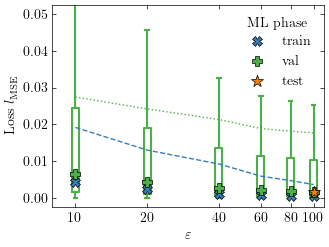

In [137]:
df = pd.read_csv("data_pattern_MSE.csv", index_col="index")
space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]

epochs = [10, 20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'Loss $l_\text{MSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_box = dict(color="#4daf4a", alpha=1, linewidth=1.5)

average_zmcc = df.groupby(['phase', 'epoch'])['MSE'].median().reset_index()
mean_zmcc = df.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()

print("\n\nTEST 100 MEAN")
print(np.mean(df.query("phase == 'test' & epoch == 100")["MSE"]))
print("TEST 100 MEAN SEM")
print(sem(df.query("phase == 'test' & epoch == 100")["MSE"]))
print("TEST 100 MEDIAN")
print(np.median(df.query("phase == 'test' & epoch == 100")["MSE"]))
print("TEST 100 MEDIAN MAD")
print(median_abs_deviation(df.query("phase == 'test' & epoch == 100")["MSE"]))
# print(percentileofscore(df.query("phase == 'test' & epoch == 100")["MSE"], 0.993))

print("\n\nVAL 100 MEAN")
print(np.mean(df.query("phase == 'val' & epoch == 100")["MSE"]))
print("VAL 100 MEAN SEM")
print(sem(df.query("phase == 'val' & epoch == 100")["MSE"]))
print("VAL 100 MEDIAN")
print(np.median(df.query("phase == 'val' & epoch == 100")["MSE"]))
print("VAL 100 MEDIAN MAD")
print(median_abs_deviation(df.query("phase == 'val' & epoch == 100")["MSE"]))

print("\n\nTRAIN 100 MEAN")
print(np.mean(df.query("phase == 'train' & epoch == 100")["MSE"]))
print("TRAIN 100 MEAN SEM")
print(sem(df.query("phase == 'train' & epoch == 100")["MSE"]))
print("TRAIN 100 MEDIAN")
print(np.median(df.query("phase == 'train' & epoch == 100")["MSE"]))
print("TRAIN 100 MEDIAN MAD")
print(median_abs_deviation(df.query("phase == 'train' & epoch == 100")["MSE"]))

for i, phase in enumerate(["train", "val"]):
    df_average_zmcc_phase = average_zmcc.loc[average_zmcc['phase'] == phase]
    df_mean_zmcc_phase = mean_zmcc.loc[average_zmcc['phase'] == phase]
        
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.015)-10**(np.log10(epoch)-0.015)
            bp = ax.boxplot(df.loc[(df['phase'] == phase) & (df['epoch'] == epoch)]["MSE"], positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)
    
    if phase == "train":
        c = "#377eb8"
    else:
        # continue
        c = "#4daf4a"
    
    # Line plot
    ax.plot(df_average_zmcc_phase["epoch"], df_average_zmcc_phase["MSE"], label=phase, linestyle="None",
            color=c, zorder=3, markersize=7, marker=["X", "P"][i], mec='black', mew=0.5)
    ax.plot(df_mean_zmcc_phase["epoch"], df_mean_zmcc_phase["MSE"], linestyle=["--", "dotted"][i],
            color=c, zorder=3, marker="None")
    # Box plot


# Scatter point
df_test = average_zmcc.loc[average_zmcc['phase'] == "test"]
df_test_std = df.groupby(['phase', 'epoch'])['MSE'].std().reset_index()

ax.scatter(100, df_test.loc[df_test["epoch"] == 100]["MSE"], label="test", marker="*", zorder=4, color="#ff7f00", s=9**2, ec='black', lw=0.5)

legend = ax.legend(title='ML phase', loc=1, frameon=True, framealpha=0.5)
legend.get_frame().set_edgecolor('none')
# legend.get_frame().set_facecolor((1, 1, 1, 0.5))
ax.autoscale(tight=True)
ax.set_xlim([8, 110])
ax.set_ylim([-0.0025, 0.0525])
ax.set(**pparam)

fig.savefig('figures/training_pattern_MSE.pdf', format="pdf")

0.9438040292506288
0.0017911192542652591
100
0.9989270478008516
0.0007887180586580445
10
0.9927620142032785
0.0063677327544308104
30.562248995983936


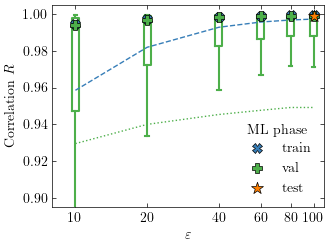

In [133]:
df = pd.read_csv("data_structure.csv", index_col="index")
space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]

epochs = [10, 20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$\text{Correlation }R$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_box = dict(color="#4daf4a", alpha=1, linewidth=1.5)

average_zmcc = df.groupby(['phase', 'epoch'])['ZMCC'].median().reset_index()
mean_zmcc = df.groupby(['phase', 'epoch'])['ZMCC'].mean().reset_index()


print(np.mean(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print(sem(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print("100")
print(np.median(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print(median_abs_deviation(df.query("phase == 'test' & epoch == 100")["ZMCC"]))
print("10")
print(np.median(df.query("phase == 'test' & epoch == 10")["ZMCC"]))
print(median_abs_deviation(df.query("phase == 'test' & epoch == 10")["ZMCC"]))
print(percentileofscore(df.query("phase == 'test' & epoch == 100")["ZMCC"], 0.993))

for i, phase in enumerate(["train", "val"]):
    df_average_zmcc_phase = average_zmcc.loc[average_zmcc['phase'] == phase]
    df_mean_zmcc_phase = mean_zmcc.loc[average_zmcc['phase'] == phase]
    
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.015)-10**(np.log10(epoch)-0.015)
            bp = ax.boxplot(df.loc[(df['phase'] == phase) & (df['epoch'] == epoch)]["ZMCC"], positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)
    
    if phase == "train":
        c = "#377eb8"
    else:
        # continue
        c = "#4daf4a"
    
    # Line plot
    ax.plot(df_average_zmcc_phase["epoch"], df_average_zmcc_phase["ZMCC"], label=phase, linestyle="None",
            color=c, zorder=3, markersize=7, marker=["X", "P"][i], mec='black', mew=0.5)
    ax.plot(df_mean_zmcc_phase["epoch"], df_mean_zmcc_phase["ZMCC"], linestyle=["--", "dotted"][i],
            color=c, zorder=3, marker="None")
    
    # Box plot


# Scatter point
df_test = average_zmcc.loc[average_zmcc['phase'] == "test"]
df_test_std = df.groupby(['phase', 'epoch'])['ZMCC'].std().reset_index()

ax.scatter(100, df_test.loc[df_test["epoch"] == 100]["ZMCC"], label="test", marker="*", zorder=4, color="#ff7f00", s=9**2, ec='black', lw=0.5)

legend = ax.legend(title='ML phase', loc=4, frameon=True, framealpha=0.5)
legend.get_frame().set_edgecolor('none')
ax.autoscale(tight=True)
ax.set_xlim([8, 110])
ax.set_ylim([0.895, 1.005])
ax.set(**pparam)

fig.savefig('figures/training_structure_CC.pdf', format="pdf")

0.00284580063740036
0.00022339349636112284
4.9151956278835e-05
4.0284611087081886e-05
100.0


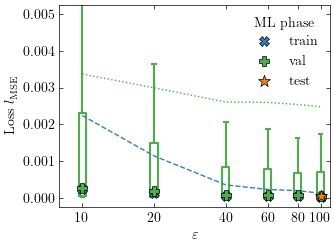

In [132]:
df = pd.read_csv("data_structure_MSE.csv", index_col="index")
space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]

epochs = [10, 20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'Loss $l_\text{MSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_box = dict(color="#4daf4a", alpha=1, linewidth=1.5)

average_zmcc = df.groupby(['phase', 'epoch'])['MSE'].median().reset_index()
mean_zmcc = df.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()


print(np.mean(df.query("phase == 'test' & epoch == 100")["MSE"]))
print(sem(df.query("phase == 'test' & epoch == 100")["MSE"]))
print(np.median(df.query("phase == 'test' & epoch == 100")["MSE"]))
print(median_abs_deviation(df.query("phase == 'test' & epoch == 100")["MSE"]))
print(percentileofscore(df.query("phase == 'test' & epoch == 100")["MSE"], 0.993))

for i, phase in enumerate(["train", "val"]):
    df_average_zmcc_phase = average_zmcc.loc[average_zmcc['phase'] == phase]
    df_mean_zmcc_phase = mean_zmcc.loc[average_zmcc['phase'] == phase]
        
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.015)-10**(np.log10(epoch)-0.015)
            bp = ax.boxplot(df.loc[(df['phase'] == phase) & (df['epoch'] == epoch)]["MSE"], positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)
    
    if phase == "train":
        c = "#377eb8"
    else:
        # continue
        c = "#4daf4a"
    
    # Line plot
    ax.plot(df_average_zmcc_phase["epoch"], df_average_zmcc_phase["MSE"], label=phase, linestyle="None",
            color=c, zorder=3, markersize=7, marker=["X", "P"][i], mec='black', mew=0.5)
    ax.plot(df_mean_zmcc_phase["epoch"], df_mean_zmcc_phase["MSE"], linestyle=["--", "dotted"][i],
            color=c, zorder=3, marker="None")
    # Box plot


# Scatter point
df_test = average_zmcc.loc[average_zmcc['phase'] == "test"]
df_test_std = df.groupby(['phase', 'epoch'])['MSE'].std().reset_index()

ax.scatter(100, df_test.loc[df_test["epoch"] == 100]["MSE"], label="test", marker="*", zorder=4, color="#ff7f00", s=9**2, ec='black', lw=0.5)

legend = ax.legend(title='ML phase', loc=1, frameon=True, framealpha=0.5)
legend.get_frame().set_edgecolor('none')
# legend.get_frame().set_facecolor((1, 1, 1, 0.5))
ax.autoscale(tight=True)
ax.set_xlim([8, 110])
ax.set_ylim([-0.00025, 0.00525])
ax.set(**pparam)

fig.savefig('figures/training_structure_MSE.pdf', format="pdf")

KeyError: 'Column not found: RMSE'

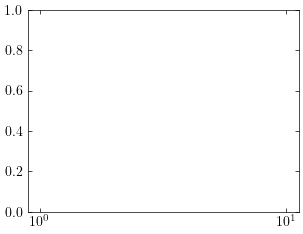

In [6]:
# epochs = [20, 40, 60, 80, 100]
# pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{\text{RMSE}}$', xticks=epochs, xticklabels=epochs)


# for group in sorted(df.group.unique()):
#     df_group = df.loc[df["group"] == group]

#     fig, ax = plt.subplots()

#     ax.set_xscale('log')
#     plt.minorticks_off()

#     colors = iter([cm.batlowS(i) for i in range(10)])

#     # c_train = next(colors)
#     # next(colors)
#     # next(colors)
#     # c_test = next(colors)
#     # c_val = next(colors)
#     c_box = dict(color="#0C5DA5")


#     average_rmse = df_group.groupby(['phase', 'epoch'])['RMSE'].mean().reset_index()
#     for i, phase in enumerate(["val", "train"]):
#         df_average_mse_phase = average_rmse.loc[average_rmse['phase'] == phase]
        
#         if phase == "train":
#             c = "#00B945"
#         else:
#             c = "#0C5DA5"
        
#         # Line plot
#         ax.plot(df_average_mse_phase["epoch"], (df_average_mse_phase["RMSE"]), label=phase, linestyle=["--", ":"][i], color=c)
        
#         # Box plot
#         if phase == "val":
#             for epoch in epochs:
#                 width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
#                 bp = ax.boxplot((df_group.loc[(df_group['phase'] == phase) & (df_group['epoch'] == epoch)]["RMSE"]), positions=[epoch], showfliers=False, widths=width,
#                     boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)

#     # Scatter point
#     df_test = average_rmse.loc[average_rmse['phase'] == "test"]
#     ax.scatter(100, (df_test.loc[df_test["epoch"] == 100]["RMSE"]), label="test", marker="*", zorder=2, color="#FF9500")

#     ax.legend(title='ML phase')
#     ax.autoscale(tight=True)
#     ax.set_xlim([18, 110])
#     ax.set_ylim([0, 0.4])
#     ax.set(**pparam)

#     fig.savefig(f'figures/training_pattern_{group}', dpi=1200)

0.029054724784821805
0.001268472384633449
   phase  epoch      RMSE
10   val     20  0.032748
11   val     40  0.028512
12   val     60  0.028153
13   val     80  0.027432
14   val    100  0.026477
   phase  epoch      RMSE
5  train     20  0.020740
6  train     40  0.012066
7  train     60  0.010220
8  train     80  0.009338
9  train    100  0.007243


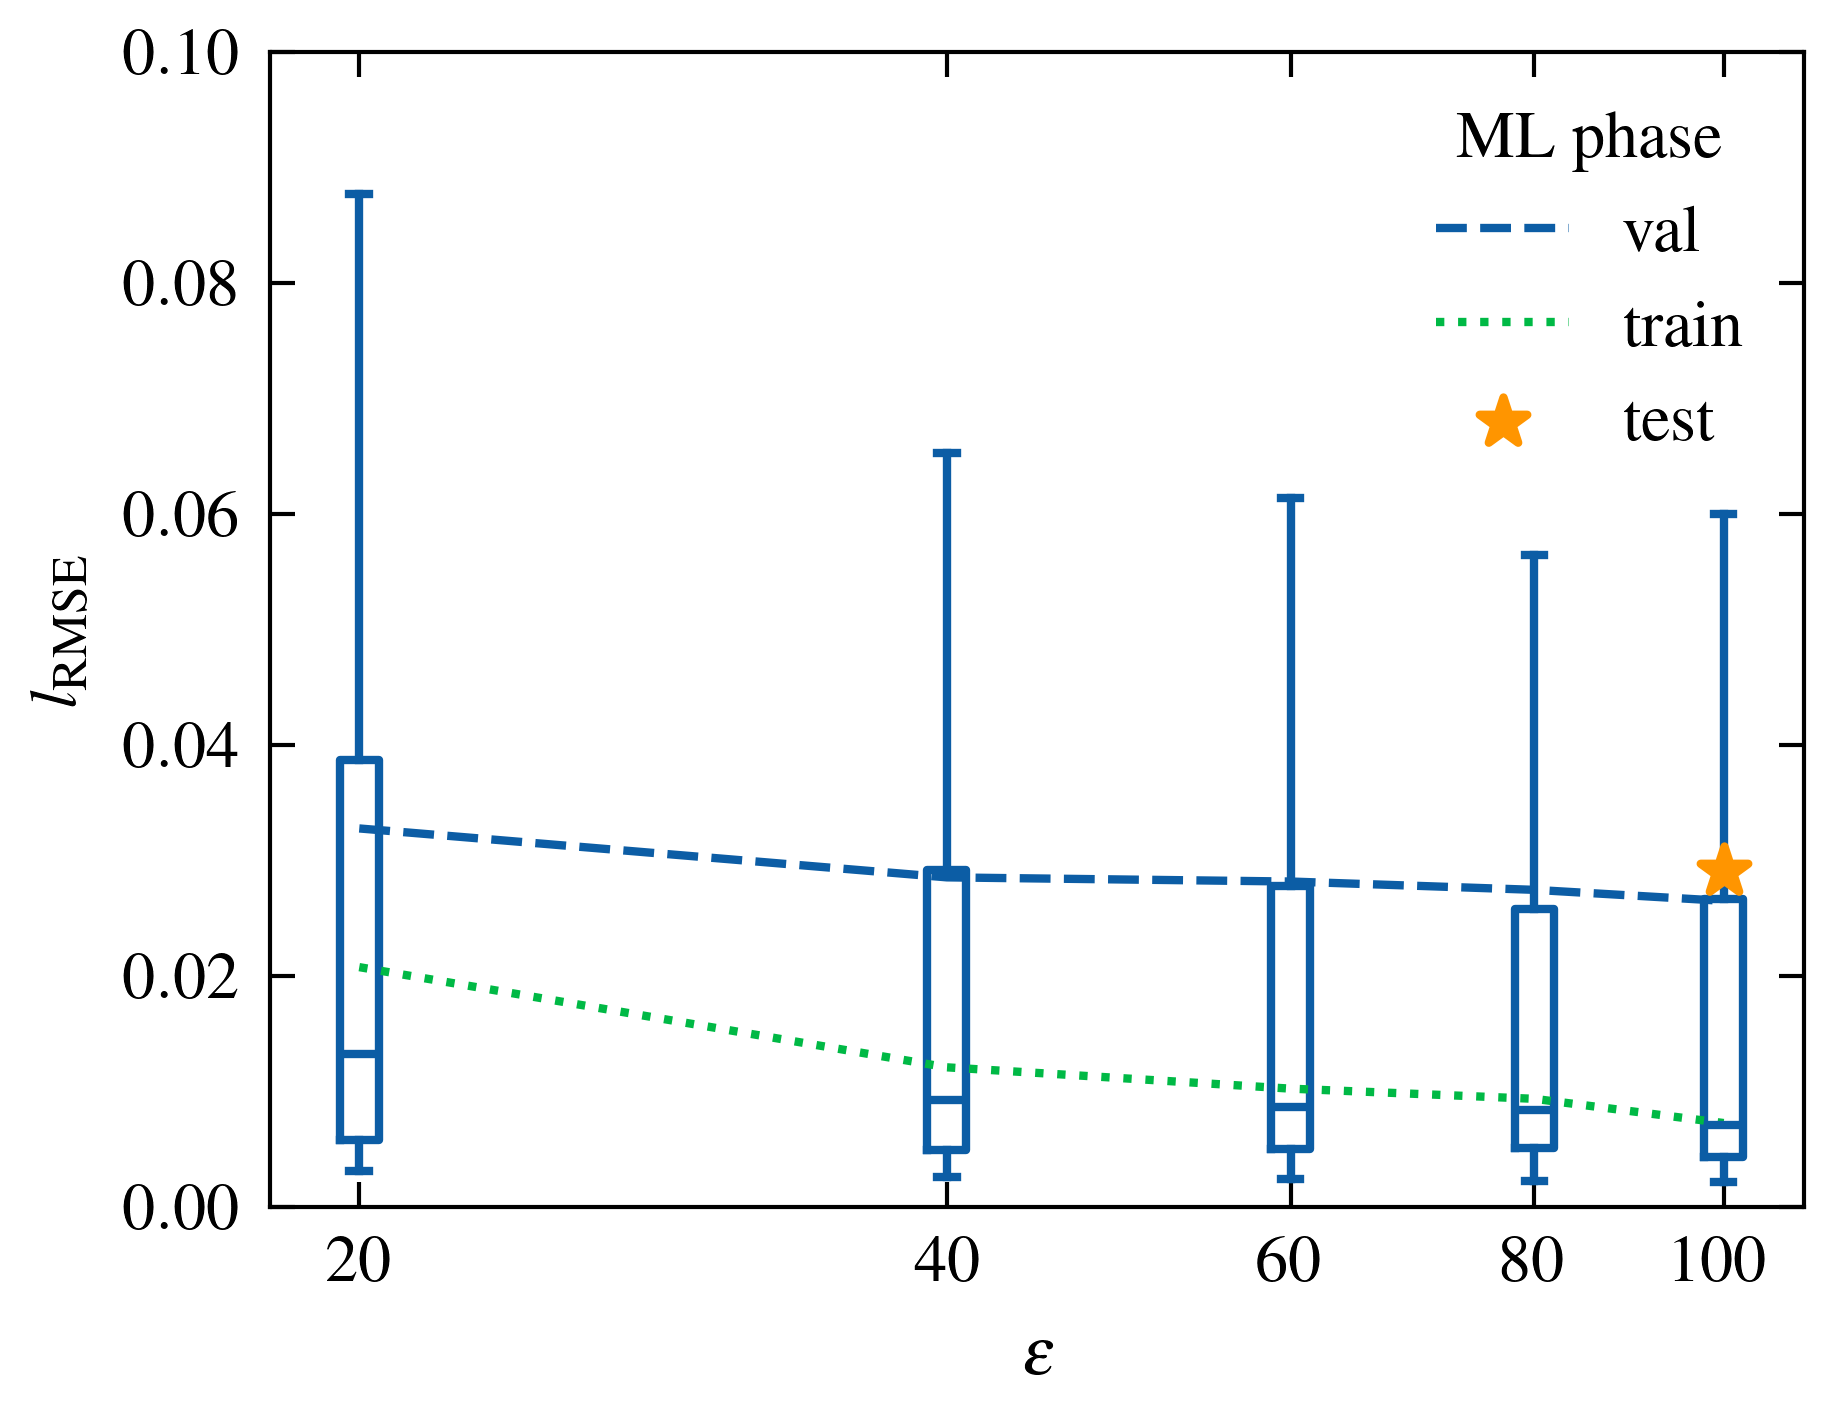

In [ ]:
# epochs = [20, 40, 60, 80, 100]
# pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{\text{RMSE}}$', xticks=epochs, xticklabels=epochs)

# fig, ax = plt.subplots()

# ax.set_xscale('log')
# plt.minorticks_off()

# average_mse = df_structure.groupby(['phase', 'epoch'])['RMSE'].mean().reset_index()

# print(np.mean(df_structure.query("phase == 'test' & epoch == 100")["RMSE"]))
# print(sem(df_structure.query("phase == 'test' & epoch == 100")["RMSE"]))


# c_box = dict(color="#0C5DA5")
# for i, phase in enumerate(["val", "train"]):
#     df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
#     print(df_average_mse_phase)
#     if phase == "train":
#         c = "#00B945"
#     else:
#         c = "#0C5DA5"
    
#     # Line plot
#     ax.plot(df_average_mse_phase["epoch"], (df_average_mse_phase["RMSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
#     # Box plot
#     if phase == "val":
#         # for epoch in epochs:
#             width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
#             bp = ax.boxplot((df_structure.loc[(df_structure['phase'] == phase) & (df_structure['epoch'] == epoch)]["RMSE"]), positions=[epoch], showfliers=False, widths=width,
#                 boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)

# # Scatter point
# df_test = average_mse.loc[average_mse['phase'] == "test"]
# ax.scatter(100, (df_test.loc[df_test["epoch"] == 100]["RMSE"]), label="test", marker="*", zorder=2, color="#FF9500")

# ax.legend(title='ML phase')
# ax.autoscale(tight=True)
# ax.set_xlim([18, 110])
# ax.set_ylim([0, 0.1])
# ax.set(**pparam)

# fig.savefig('figures/training_structure', dpi=1200)

In [ ]:
# df_I = df.loc[df["group"] == "I a -3 d"]